## LIBRARIES AND PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## DATA 

In [2]:
def get_football_data():
    print("Downloading Premier League data...")
    season_urls = {
        '2022-23': 'https://www.football-data.co.uk/mmz4281/2223/E0.csv',
        '2023-24': 'https://www.football-data.co.uk/mmz4281/2324/E0.csv',
        '2024-25': 'https://www.football-data.co.uk/mmz4281/2425/E0.csv'
    }

    all_matches = []
    for season, url in season_urls.items():
        df = pd.read_csv(url)
        df["Season"] = season
        all_matches.append(df)

    match_data = pd.concat(all_matches, ignore_index=True)
    return match_data


df = get_football_data()
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data structure

In [3]:
df.shape

(1140, 133)

In [4]:
#columns
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA', 'BFEC>2.5',
       'BFEC<2.5', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=133)

### Data Description

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,1140.0,1.649123,1.359663,0.00,1.00,1.00,2.0000,9.00
FTAG,1140.0,1.372807,1.221895,0.00,0.00,1.00,2.0000,8.00
HTHG,1140.0,0.748246,0.875351,0.00,0.00,1.00,1.0000,5.00
HTAG,1140.0,0.600000,0.800351,0.00,0.00,0.00,1.0000,5.00
HS,1140.0,14.369298,5.867690,1.00,10.00,14.00,18.0000,36.00
...,...,...,...,...,...,...,...,...
BFECA,380.0,4.999921,4.652929,1.21,2.28,3.35,5.7000,32.00
BFEC>2.5,380.0,1.715789,0.246827,1.21,1.54,1.69,1.8600,2.66
BFEC<2.5,380.0,2.541737,0.557118,1.59,2.14,2.43,2.8250,5.50
BFECAHH,380.0,1.983079,0.088226,1.75,1.91,1.98,2.0525,2.21


In [6]:
#including categorical
df.describe(include='O')

,Div,Date,Time,HomeTeam,AwayTeam,FTR,HTR,Referee,Season
count,1140,1140,1140,1140,1140,1140,1140,1140,1140
unique,1,346,21,24,24,3,3,34,3
top,E0,25/05/2025,15:00,Crystal Palace,Arsenal,H,D,A Taylor,2022-23
freq,1140,10,406,57,57,514,434,87,380


### Duplicates

In [7]:
df.duplicated().sum()

0

**No duplicates on our dataset**

In [8]:
print(df.columns.tolist())

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Season', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BFEH', 'BFED', 'BFEA',

### Data Retention Decision

I will retain only the **match metadata**, **scoreline information**, and **performance statistics** because these variables describe the game itself without relying on betting market data. All other columns in the dataset are **bookmaker odds**, which pose two main problems for my goal of predicting the **2025–26 Premier League winner**:

#### 1. Data Leakage
- Odds are set just before each match and already incorporate knowledge about team strength, injuries, and other factors unavailable at the start of the season.  
- Using them would effectively feed my model the outcome probabilities determined by bookmakers, making predictions **unrealistically accurate** for past seasons but **unusable before future games**.

#### 2. Future Applicability
- For the 2025–26 season, **pre-match odds for every fixture** are not available in advance.  
- Relying on them would prevent me from making **early predicBy retaining only the **non-odds columns** — i.e., **goals, shots, fouls, cards**, and other **in-game statistics** — I ensure the model is built on genuine performance data.
rmance data.
on framework**.


In [9]:
columns_to_retain = [
    "Date", "Time", "HomeTeam", "AwayTeam", "Referee",
    "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR",
    "HS", "AS", "HST", "AST",
    "HF", "AF", "HC", "AC",
    "HY", "AY", "HR", "AR"
]

df1 = df[columns_to_retain]


In [10]:
df1.shape

(1140, 23)

In [11]:
pd.set_option('display.max_rows', None)
missing_percent = df1.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

Date        0.0
AS          0.0
HR          0.0
AY          0.0
HY          0.0
AC          0.0
HC          0.0
AF          0.0
HF          0.0
AST         0.0
HST         0.0
HS          0.0
Time        0.0
HTR         0.0
HTAG        0.0
HTHG        0.0
FTR         0.0
FTAG        0.0
FTHG        0.0
Referee     0.0
AwayTeam    0.0
HomeTeam    0.0
AR          0.0
dtype: float64


### Dataset Column Descriptions (Key Match Data)  
- **Date**: Match date (dd/mm/yy)  
- **Time**: Kick-off time  
- **HomeTeam / AwayTeam**: Teams playing  
- **Referee**: Match refe
ree  

- **FTHG / FTAG**: Full-time goals (home/away)  
- **FTR**: Full-time result (H=home win, D=draw, A=away win)  
- **HTHG / HTAG**: Half-time goals (home/away)  
- **HTR**: Half-time result
 (H/D/A)  

- **HS / AS**: Shots (home/away)  
- **HST / AST**: Shots on target (home/away)  
- **HF / AF**: Fouls committed (home/away)  
- **HC / AC**: Corners (home/away)  
- **HY / AY**: Yellow cards (home/away)  
- **HR / AR**: Red cards (home/away)


In [12]:
df1.head()

,Date,Time,HomeTeam,AwayTeam,Referee,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,A Taylor,0,2,A,0,1,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,A Madley,2,2,D,1,0,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,P Bankes,2,0,H,1,0,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,R Jones,2,1,H,1,1,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nott'm Forest,S Hooper,2,0,H,0,0,...,10,0,9,14,11,1,0,3,0,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1140 non-null   object
 1   Time      1140 non-null   object
 2   HomeTeam  1140 non-null   object
 3   AwayTeam  1140 non-null   object
 4   Referee   1140 non-null   object
 5   FTHG      1140 non-null   int64 
 6   FTAG      1140 non-null   int64 
 7   FTR       1140 non-null   object
 8   HTHG      1140 non-null   int64 
 9   HTAG      1140 non-null   int64 
 10  HTR       1140 non-null   object
 11  HS        1140 non-null   int64 
 12  AS        1140 non-null   int64 
 13  HST       1140 non-null   int64 
 14  AST       1140 non-null   int64 
 15  HF        1140 non-null   int64 
 16  AF        1140 non-null   int64 
 17  HC        1140 non-null   int64 
 18  AC        1140 non-null   int64 
 19  HY        1140 non-null   int64 
 20  AY        1140 non-null   int64 
 21  HR        1140

### Converting date and time to datetime data type

In [14]:
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], format='%d/%m/%Y %H:%M', errors='coerce')
data = df1.drop(columns = ['Date', 'Time'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8172\3557455047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], format='%d/%m/%Y %H:%M', errors='coerce')


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   HomeTeam  1140 non-null   object        
 1   AwayTeam  1140 non-null   object        
 2   Referee   1140 non-null   object        
 3   FTHG      1140 non-null   int64         
 4   FTAG      1140 non-null   int64         
 5   FTR       1140 non-null   object        
 6   HTHG      1140 non-null   int64         
 7   HTAG      1140 non-null   int64         
 8   HTR       1140 non-null   object        
 9   HS        1140 non-null   int64         
 10  AS        1140 non-null   int64         
 11  HST       1140 non-null   int64         
 12  AST       1140 non-null   int64         
 13  HF        1140 non-null   int64         
 14  AF        1140 non-null   int64         
 15  HC        1140 non-null   int64         
 16  AC        1140 non-null   int64         
 17  HY        1140

### Checking Unique Values in Each Column

In [16]:
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("*******************")

Column: HomeTeam
['Crystal Palace' 'Fulham' 'Bournemouth' 'Leeds' 'Newcastle' 'Tottenham'
 'Everton' 'Leicester' 'Man United' 'West Ham' 'Aston Villa' 'Arsenal'
 'Brighton' 'Man City' 'Southampton' 'Wolves' 'Brentford' "Nott'm Forest"
 'Chelsea' 'Liverpool' 'Burnley' 'Sheffield United' 'Luton' 'Ipswich']
*******************
Column: AwayTeam
['Arsenal' 'Liverpool' 'Aston Villa' 'Wolves' "Nott'm Forest"
 'Southampton' 'Chelsea' 'Brentford' 'Brighton' 'Man City' 'Everton'
 'Leicester' 'Newcastle' 'Bournemouth' 'Leeds' 'Fulham' 'Man United'
 'West Ham' 'Tottenham' 'Crystal Palace' 'Luton' 'Sheffield United'
 'Burnley' 'Ipswich']
*******************
Column: Referee
['A Taylor' 'A Madley' 'P Bankes' 'R Jones' 'S Hooper' 'A Marriner'
 'C Pawson' 'J Gillett' 'P Tierney' 'M Oliver' 'D England' 'G Scott'
 'D Coote' 'T Harrington' 'J Brooks' 'S Attwell' 'M Salisbury' 'T Bramall'
 'C Kavanagh' 'R Madley' 'D Bond' 'T Robinson' 'J Smith' 'S Barrott'
 'R Welch' 'S Allison' 'L Smith' 'S Singh' 'J Gill

### Removing white space on referee column

In [17]:
data['Referee'] = data['Referee'].str.strip()

# EDA 

### UNIVARIATE ANALYIS

#### Distribution of Home Team Shots

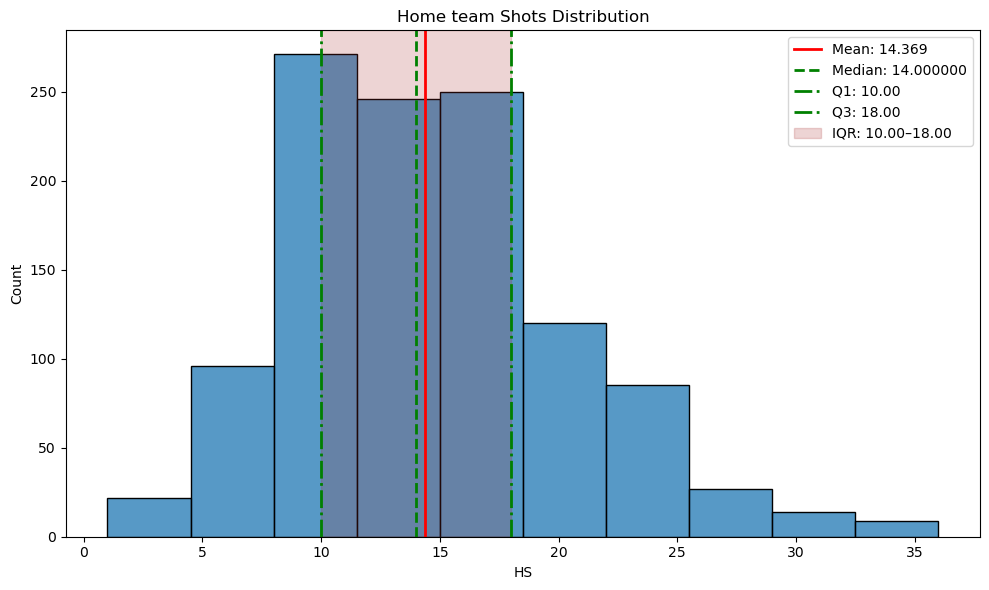

In [18]:
median_val = data['HS'].median()
mean_val = data['HS'].mean()
q1 = data['HS'].quantile(0.25)
q3 = data['HS'].quantile(0.75)

plt.figure(figsize=(10,6))
sns.histplot(data['HS'],bins=10,edgecolor="black")

#adding vertical lines
plt.axvline(mean_val, color = 'red', linestyle='-', linewidth=2, label = f"Mean: {mean_val:.3f}")
plt.axvline(median_val, color = 'green', linestyle = '--',linewidth=2, label = f"Median: {median_val:3f}")
plt.axvline(q1, color = 'green', linestyle = '-.', linewidth=2, label= f"Q1: {q1:.2f}")
plt.axvline(q3, color = 'green', linestyle = '-.', linewidth=2, label= f"Q3: {q3:.2f}")


#Shading IQR range
plt.axvspan(q1,q3, color = 'brown', alpha = 0.2, label=f"IQR: {q1:.2f}–{q3:.2f}")

#adding title and formatting
plt.title("Home team Shots Distribution")
plt.xlabel("HS")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show();

**Majority of home team shots range between 10 and 18. The distribution has a right tail showing a skewness highlighting that a good number of games have quite a good number shots by the home team** 

#### **Distribution of Goals Scored**

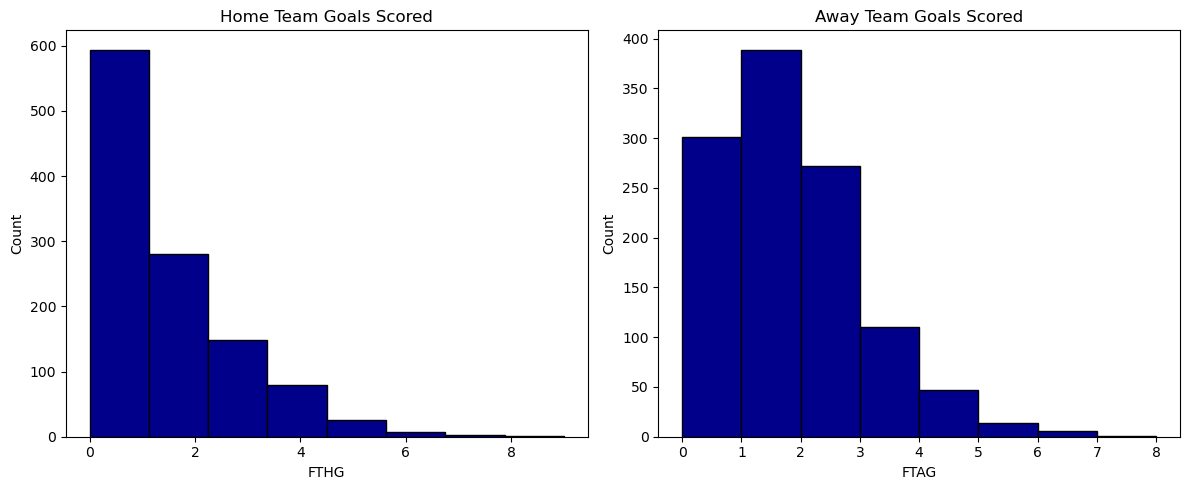

In [19]:
goals_col = ['FTHG', 'FTAG']

fig, axes = plt.subplots(1,2, figsize=(12, 5))
for ax, col, title in zip(axes, goals_col, ['Home Team Goals Scored', 'Away Team Goals Scored']):
    ax.hist(data[col], bins=8, color='darkblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show();

**Both graphs show similar trends with a right tail. This highlights that high scoring games were very rare but had occurence. Majority games ended with scores between 0 and 2 for home teams while away teams ended with scores between 0 to 3. Slightly higher. Away teams had better performance than home teams.**

#### **Distribution of games by Referee**

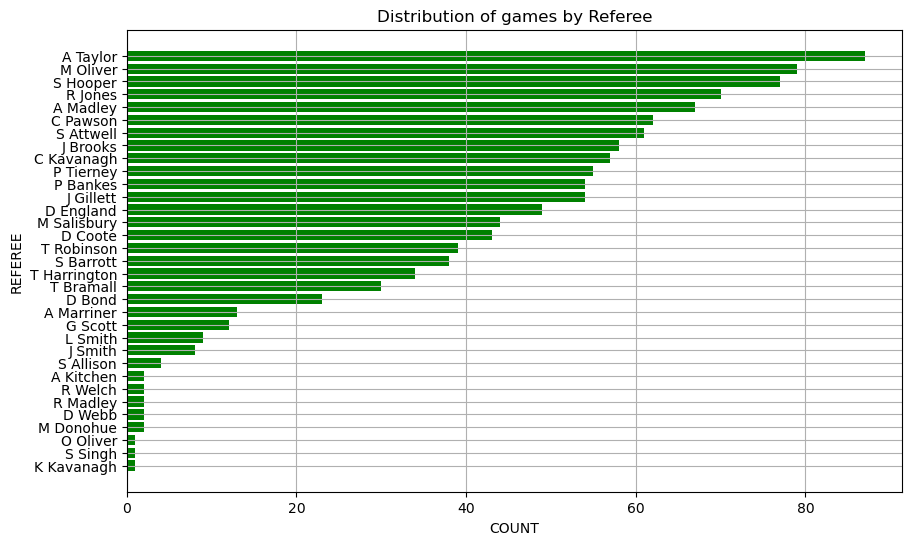

In [20]:
referee_games = data.groupby('Referee').size().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(referee_games.index, referee_games, color='green')
plt.title('Distribution of games by Referee')
plt.xlabel("COUNT")
plt.ylabel("REFEREE")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show();

**`A Taylor`, `Michael Oliver` and  `S Hooper` refereed majority games, while `Kris Kavanagh`, `S Singh` and `O Oliver` refereed the least amount of games over the three seasons.**

#### **Shots on Target Distribution**

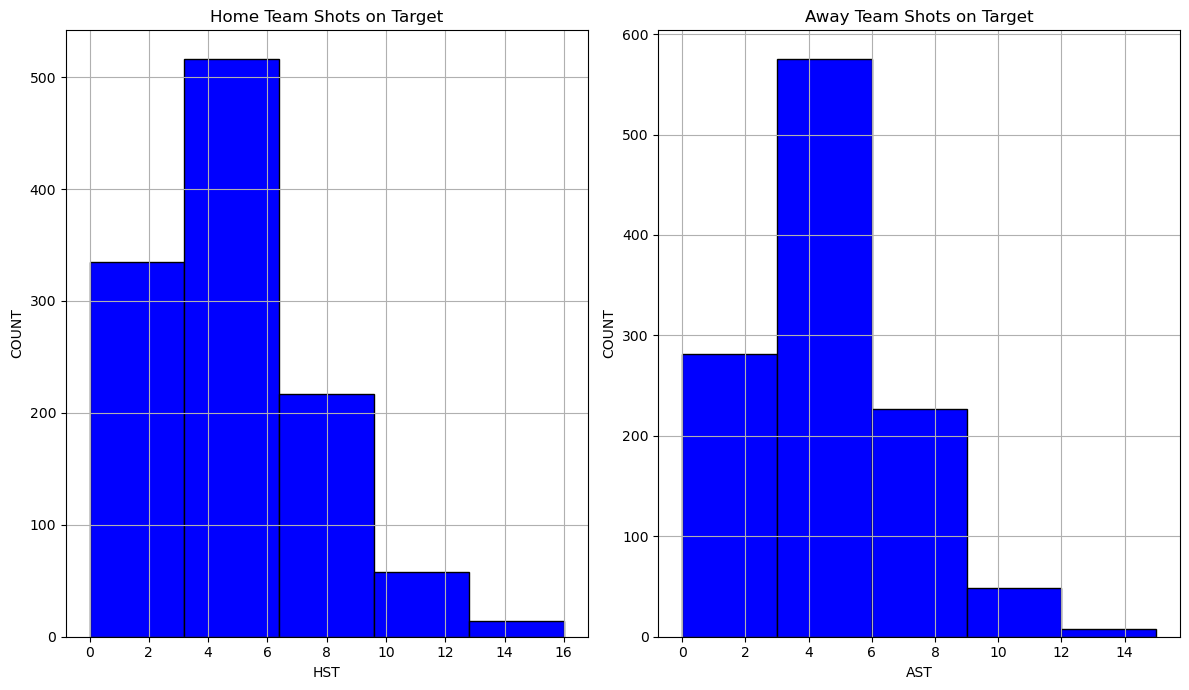

In [21]:
target_cols = ['HST', 'AST']

fig, axes = plt.subplots(1, 2, figsize=(12,7))

for ax, col, title in zip(axes, target_cols, ["Home Team Shots on Target", "Away Team Shots on Target"]):
    ax.hist(data[col], bins=5, color='blue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("COUNT")
    ax.grid(True)


plt.tight_layout()
plt.show();

### BIVARIATE ANALYIS

### **Home Shots vs Away Shots**

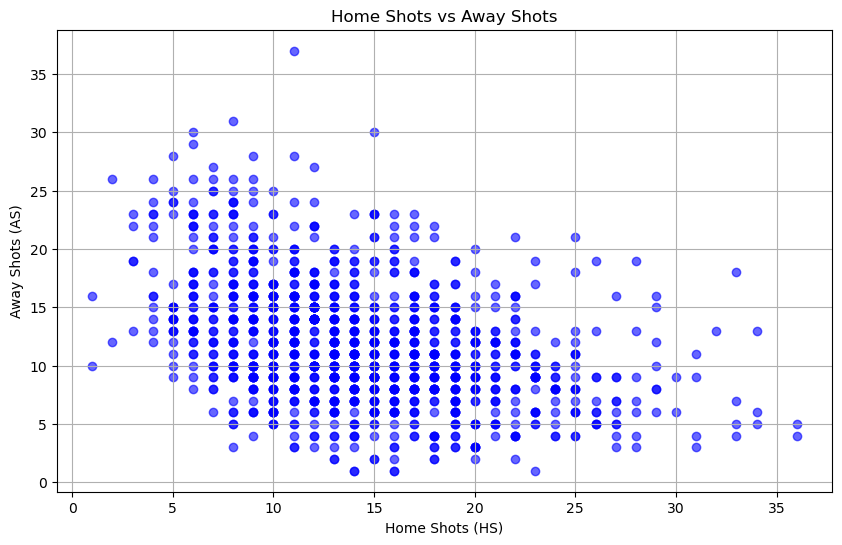

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(data['HS'], data['AS'], color='blue', alpha=0.6)
plt.title('Home Shots vs Away Shots')
plt.xlabel('Home Shots (HS)')
plt.ylabel('Away Shots (AS)')
plt.grid(True)
plt.show()

#### **Average Home Shots Distribution Per Team**

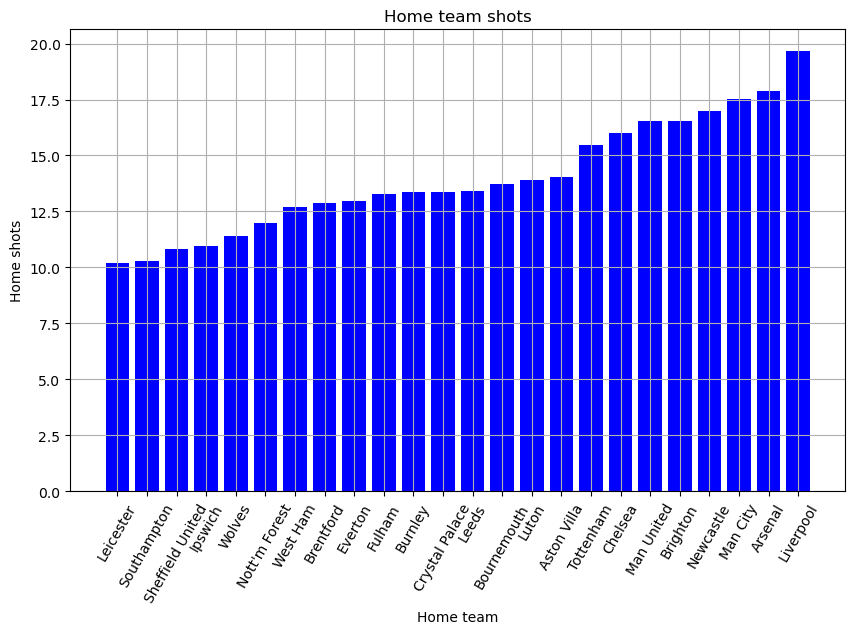

In [23]:
avg_home_shots = data.groupby('HomeTeam')['HS'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.bar(avg_home_shots.index, avg_home_shots.values, color='blue')
plt.title('Home team shots')
plt.xlabel('Home team')
plt.xticks(rotation=60)
plt.ylabel('Home shots')
plt.grid(True)
plt.show();

**From the average home shots, we can observe that the winners of the last three seasons `Man City(x2)` and `Liverpool(x1)` are the ones leading with shots while `Arsenal` who have been second through the three campaigns also second in total average home shots.**

#### **Average Away Shots Distribution Per Team**

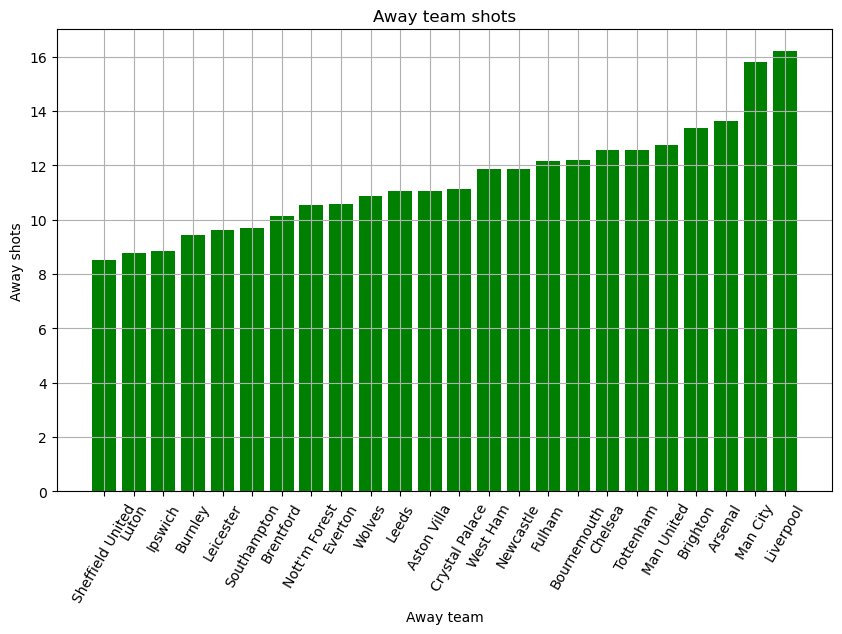

In [24]:
avg_away_shots = data.groupby('AwayTeam')['AS'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.bar(avg_away_shots.index, avg_away_shots.values, color='green')
plt.title('Away team shots')
plt.xlabel('Away team')
plt.xticks(rotation=60)
plt.ylabel('Away shots')
plt.grid(True)
plt.show();

**Away team shots graph also follow the Home team shots trend whereby the leading team over the last three seasons are the ones on top i.e. `Liverpool`, `Man Cit`y and `Arsenal` having the highest average away shots during the campaign.
Worth noting is that teams which have been relegated over the last three campaigns perform poorly in shots at home and away. These teams include `Sheffield United`, `Luton`, `Ipswich`, `Leicester` and `Southampton`. `Burnley` and `Luton` shows poor form away but its form at home is quite average.**

### **Shots vs Shots on Target**

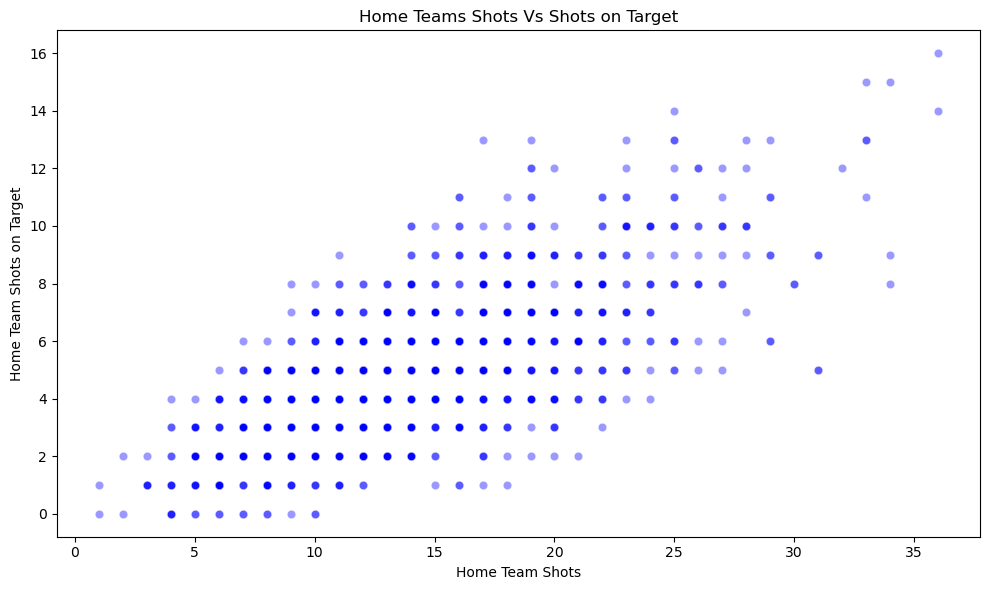

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['HS'],y=data['HST'], alpha=0.4, color='blue')
plt.title("Home Teams Shots Vs Shots on Target")
plt.xlabel("Home Team Shots")
plt.ylabel("Home Team Shots on Target")
plt.tight_layout()
plt.show();

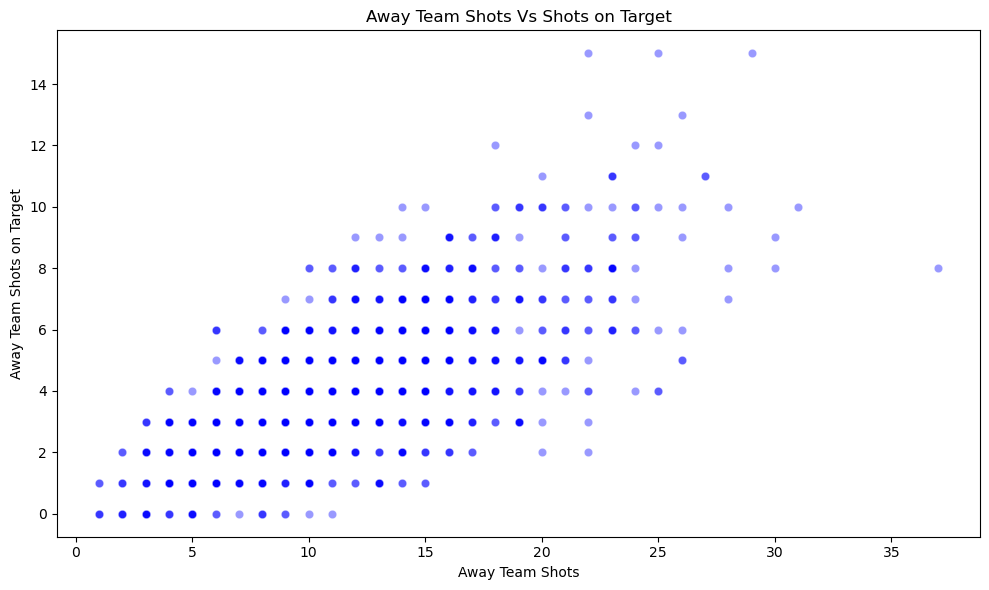

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['AS'],y=data['AST'], alpha=0.4, color='blue')
plt.title("Away Team Shots Vs Shots on Target")
plt.xlabel("Away Team Shots")
plt.ylabel("Away Team Shots on Target")
plt.tight_layout()
plt.show();

**Both graphs show that there is a decent linear relationship between total shots and shots and target. Higher shot number leads to an increase number of shots on target and vice versa. There is more density in the middle showing that most games averaged between 5 and 25 shots and 2 and 10 for shots on target**

### MULTIVARIATE ANALYSIS

### **CORR MATRIX**

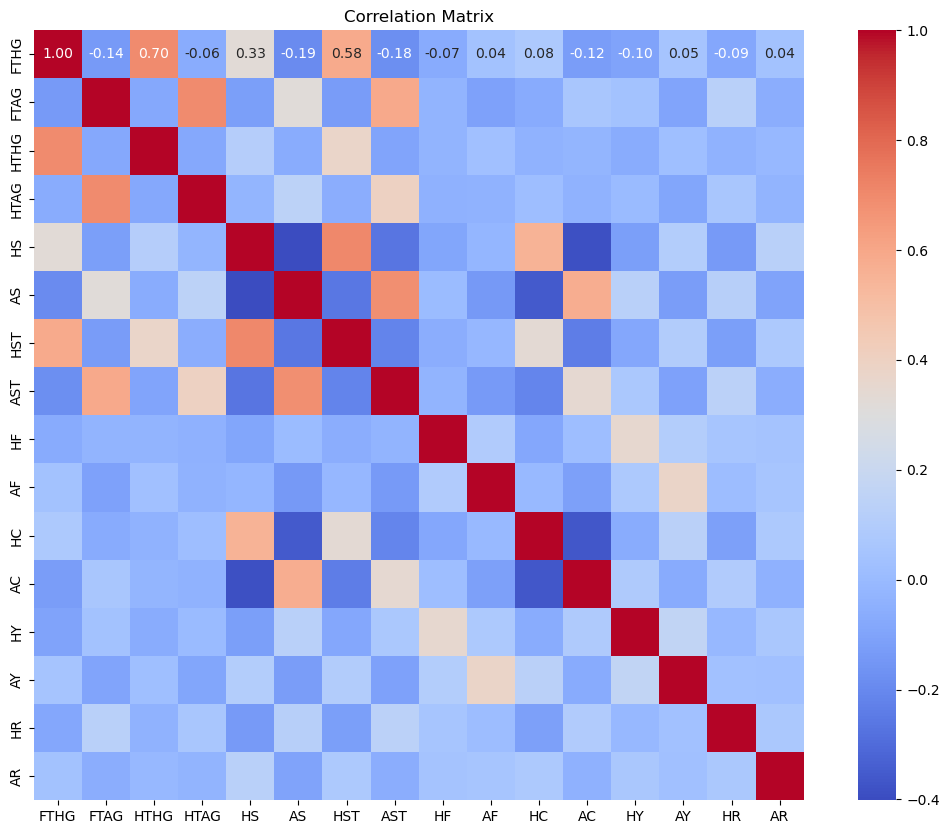

In [27]:
corr = data.select_dtypes(include='number').corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

### **Result by Shots and Fouls**

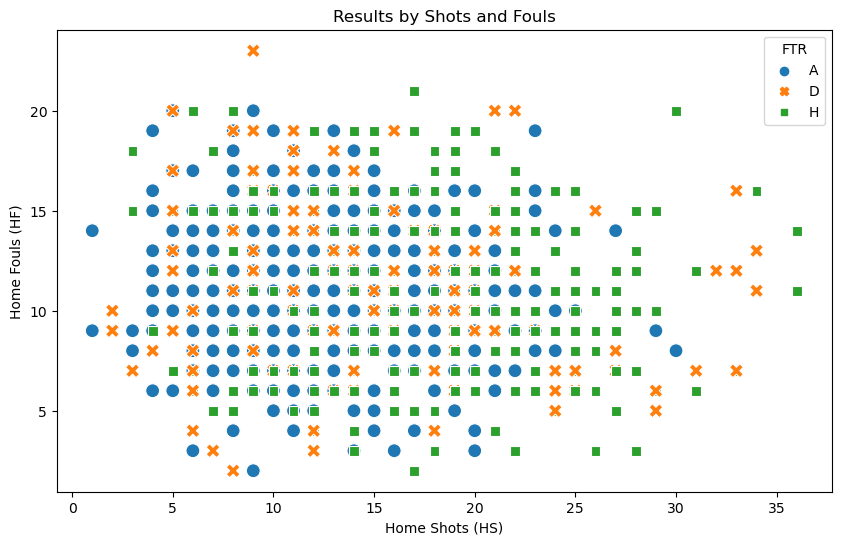

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='HS', 
    y='HF', 
    hue='FTR',
    style = 'FTR',
    s = 100,
    data=data
    )
plt.title("Results by Shots and Fouls")
plt.xlabel("Home Shots (HS)")
plt.ylabel("Home Fouls (HF)")
plt.legend(title='FTR')
plt.show()

### **Season Timeline of Goals**

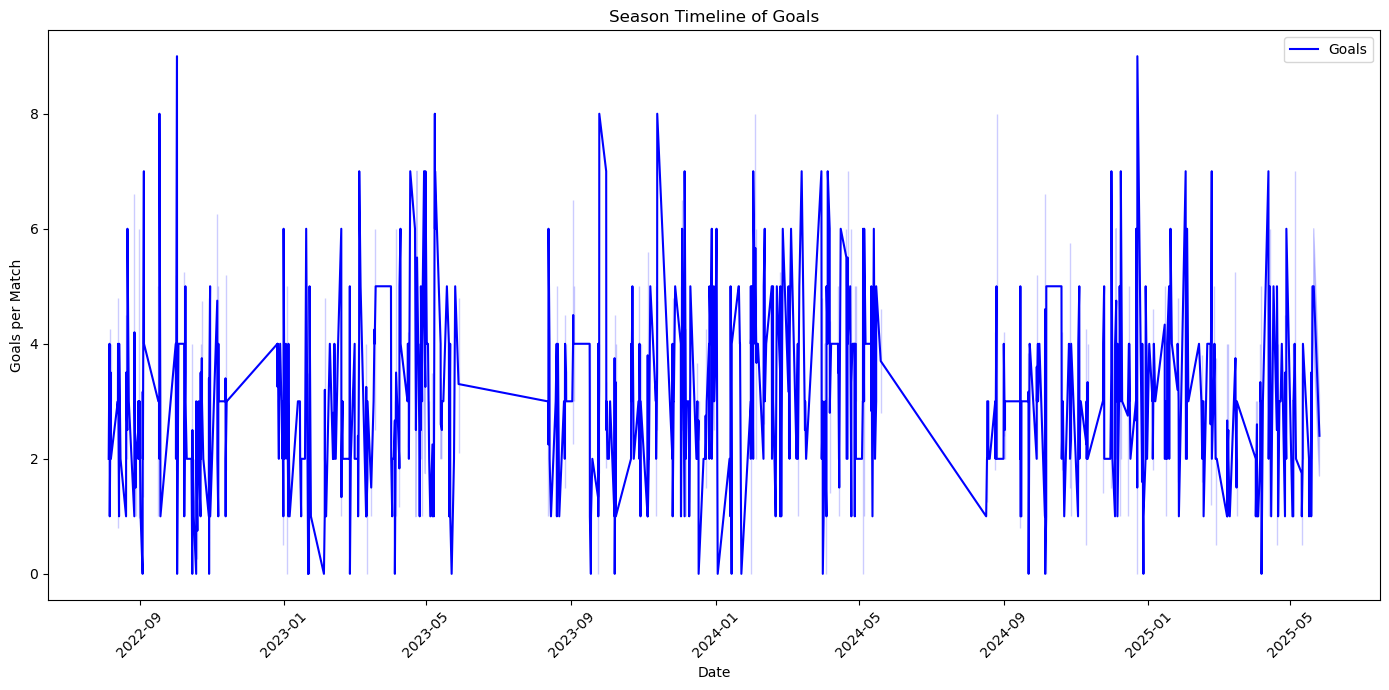

In [29]:

data = data.sort_values('Datetime')

plt.figure(figsize=(14,7))

# Home goals line
sns.lineplot(x='Datetime', y=data['FTHG']+data['FTAG'], data=data, label='Goals', color='blue')

plt.title("Season Timeline of Goals")
plt.xlabel("Date")
plt.ylabel("Goals per Match")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
